In [3]:
# Additional torch-related imports
import torch
from torch import cat, no_grad, manual_seed
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.optim as optim
import numpy as np
from torch.nn import (
    Module,
    Conv2d,
    Linear,
    Dropout2d,
    NLLLoss,
    MaxPool2d,
    Flatten,
    Sequential,
    ReLU,
)
import torch.nn.functional as F
# Necessary imports

import numpy as np
import matplotlib.pyplot as plt

from torch import Tensor
from torch.nn import Linear, CrossEntropyLoss, MSELoss
from torch.optim import LBFGS

from qiskit import QuantumCircuit
from qiskit import QuantumRegister
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.utils import algorithm_globals
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_machine_learning.connectors import TorchConnector

# Set seed for random generators
algorithm_globals.random_seed = 42

In [4]:
# Train Dataset
# -------------

# Set train shuffle seed (for reproducibility)
manual_seed(42)

batch_size = 1
n_samples = 100  # We will concentrate on the first 100 samples

# Use pre-defined torchvision function to load MNIST train data
X_train = datasets.MNIST(
    root="./data", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()])
)

# Filter out labels (originally 0-9), leaving only labels 0 and 1
idx = np.append(
    np.where(X_train.targets == 0)[0][:n_samples], np.where(X_train.targets == 1)[0][:n_samples]
)
X_train.data = X_train.data[idx]
X_train.targets = X_train.targets[idx]

# Define torch dataloader with filtered data
train_loader = DataLoader(X_train, batch_size=batch_size, shuffle=True)

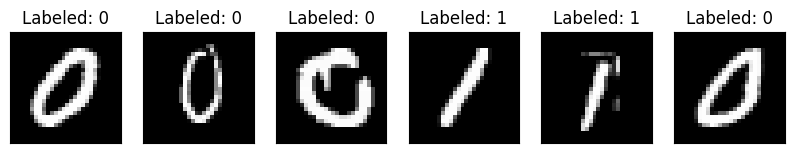

In [5]:
from matplotlib import pyplot as plt

n_samples_show = 6

data_iter = iter(train_loader)
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(10, 3))

while n_samples_show > 0:
    images, targets = data_iter.__next__()

    axes[n_samples_show - 1].imshow(images[0, 0].numpy().squeeze(), cmap="gray")
    axes[n_samples_show - 1].set_xticks([])
    axes[n_samples_show - 1].set_yticks([])
    axes[n_samples_show - 1].set_title("Labeled: {}".format(targets[0].item()))

    n_samples_show -= 1

In [6]:
# Test Dataset
# -------------

# Set test shuffle seed (for reproducibility)
# manual_seed(5)

n_samples = 50

# Use pre-defined torchvision function to load MNIST test data
X_test = datasets.MNIST(
    root="./data", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()])
)

# Filter out labels (originally 0-9), leaving only labels 0 and 1
idx = np.append(
    np.where(X_test.targets == 0)[0][:n_samples], np.where(X_test.targets == 1)[0][:n_samples]
)
X_test.data = X_test.data[idx]
X_test.targets = X_test.targets[idx]

# Define torch dataloader with filtered data
test_loader = DataLoader(X_test, batch_size=batch_size, shuffle=True)

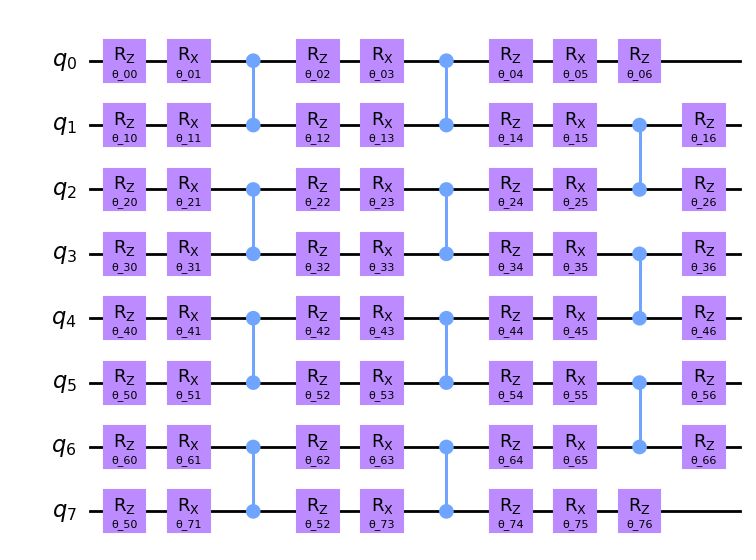

In [41]:
birckworkstate = QuantumCircuit(8)


# Define the quantum circuit and registers
qr = QuantumRegister(8, 'q')
birckworkstate = QuantumCircuit(qr)

# Define the variational parameters
θ_00 = Parameter('θ_00')
θ_01 = Parameter('θ_01')
θ_02 = Parameter('θ_02')
θ_03 = Parameter('θ_03')
θ_04 = Parameter('θ_04')
θ_05 = Parameter('θ_05')
θ_06 = Parameter('θ_06')
θ_10 = Parameter('θ_10')
θ_11 = Parameter('θ_11')
θ_12 = Parameter('θ_12')
θ_13 = Parameter('θ_13')
θ_14 = Parameter('θ_14')
θ_15 = Parameter('θ_15')
θ_16 = Parameter('θ_16')
θ_20 = Parameter('θ_20')
θ_21 = Parameter('θ_21')
θ_22 = Parameter('θ_22')
θ_23 = Parameter('θ_23')
θ_24 = Parameter('θ_24')
θ_25 = Parameter('θ_25')
θ_26 = Parameter('θ_26')
θ_30 = Parameter('θ_30')
θ_31 = Parameter('θ_31')
θ_32 = Parameter('θ_32')
θ_33 = Parameter('θ_33')
θ_34 = Parameter('θ_34')
θ_35 = Parameter('θ_35')
θ_36 = Parameter('θ_36')
θ_40 = Parameter('θ_40')
θ_41 = Parameter('θ_41')
θ_42 = Parameter('θ_42')
θ_43 = Parameter('θ_43')
θ_44 = Parameter('θ_44')
θ_45 = Parameter('θ_45')
θ_46 = Parameter('θ_46')
θ_50 = Parameter('θ_50')
θ_51 = Parameter('θ_51')
θ_52 = Parameter('θ_52')
θ_53 = Parameter('θ_53')
θ_54 = Parameter('θ_54')
θ_55 = Parameter('θ_55')
θ_56 = Parameter('θ_56')
θ_60 = Parameter('θ_60')
θ_61 = Parameter('θ_61')
θ_62 = Parameter('θ_62')
θ_63 = Parameter('θ_63')
θ_64 = Parameter('θ_64')
θ_65 = Parameter('θ_65')
θ_66 = Parameter('θ_66')
θ_70 = Parameter('θ_70')
θ_71 = Parameter('θ_71')
θ_72 = Parameter('θ_72')
θ_73 = Parameter('θ_73')
θ_74 = Parameter('θ_74')
θ_75 = Parameter('θ_75')
θ_76 = Parameter('θ_76')

# Apply R_z(θ_00) with parameter θ_00 on qubit 0
birckworkstate.rz(θ_00, qr[0])
# Apply R_x(θ_01) with parameter θ_01 on qubit 0
birckworkstate.rx(θ_01, qr[0])
# Apply R_z(θ_10) with parameter θ_10 on qubit 0
birckworkstate.rz(θ_10, qr[1])
# Apply R_x(θ_11) with parameter θ_11 on qubit 0
birckworkstate.rx(θ_11, qr[1])
# Apply CZ(Control:qubit 0, Target:qubit 1)
birckworkstate.cz(qr[0], qr[1])
# Apply R_z(θ_02) with parameter θ_02 on qubit 1
birckworkstate.rz(θ_02, qr[0])
# Apply R_x(θ_03) with parameter θ_03 on qubit 1
birckworkstate.rx(θ_03, qr[0])
# Apply R_z(θ_12) with parameter θ_12 on qubit 1
birckworkstate.rz(θ_12, qr[1])
# Apply R_x(θ_13) with parameter θ_13 on qubit 1
birckworkstate.rx(θ_13, qr[1])
# Apply CZ(Control:qubit 0, Target:qubit 1)
birckworkstate.cz(qr[0], qr[1])
# Apply R_z(θ_04) with parameter θ_04 on qubit 0
birckworkstate.rz(θ_04, qr[0])
# Apply R_x(θ_05) with parameter θ_05 on qubit 0
birckworkstate.rx(θ_05, qr[0])
# Apply R_z(θ_06) with parameter θ_06 on qubit 1
birckworkstate.rz(θ_06, qr[0])
# Apply R_z(θ_14) with parameter θ_14 on qubit 0
birckworkstate.rz(θ_14, qr[1])
# Apply R_x(θ_15) with parameter θ_15 on qubit 0
birckworkstate.rx(θ_15, qr[1])



# Apply R_z(θ_20) with parameter θ_20 on qubit 2
birckworkstate.rz(θ_20, qr[2])
# Apply R_x(θ_21) with parameter θ_21 on qubit 2
birckworkstate.rx(θ_21, qr[2])
# Apply R_z(θ_30) with parameter θ_30 on qubit 3
birckworkstate.rz(θ_30, qr[3])
# Apply R_x(θ_31) with parameter θ_31 on qubit 3
birckworkstate.rx(θ_31, qr[3])
# Apply CZ(Control:qubit 2, Target:qubit 3)
birckworkstate.cz(qr[2], qr[3])
# Apply R_z(θ_22) with parameter θ_22 on qubit 2
birckworkstate.rz(θ_22, qr[2])
# Apply R_x(θ_23) with parameter θ_23 on qubit 2
birckworkstate.rx(θ_23, qr[2])
# Apply R_z(θ_32) with parameter θ_32 on qubit 3
birckworkstate.rz(θ_32, qr[3])
# Apply R_x(θ_33) with parameter θ_33 on qubit 3
birckworkstate.rx(θ_33, qr[3])
# Apply CZ(Control:qubit 2, Target:qubit 3)
birckworkstate.cz(qr[2], qr[3])
# Apply R_z(θ_24) with parameter θ_24 on qubit 2
birckworkstate.rz(θ_24, qr[2])
# Apply R_x(θ_25) with parameter θ_25 on qubit 2
birckworkstate.rx(θ_25, qr[2])
# Apply CZ(Control:qubit 1, Target:qubit 2)
birckworkstate.cz(qr[1], qr[2])
# Apply R_z(θ_16) with parameter θ_16 on qubit 1
birckworkstate.rz(θ_16, qr[1])
# Apply R_z(θ_26) with parameter θ_26 on qubit 2
birckworkstate.rz(θ_26, qr[2])
# Apply R_z(θ_34) with parameter θ_34 on qubit 3
birckworkstate.rz(θ_34, qr[3])
# Apply R_x(θ_35) with parameter θ_35 on qubit 3
birckworkstate.rx(θ_35, qr[3])


# Apply R_z(θ_40) with parameter θ_40 on qubit 4
birckworkstate.rz(θ_40, qr[4])
# Apply R_x(θ_41) with parameter θ_41 on qubit 4
birckworkstate.rx(θ_41, qr[4])
# Apply R_z(θ_50) with parameter θ_50 on qubit 5
birckworkstate.rz(θ_50, qr[5])
# Apply R_x(θ_51) with parameter θ_51 on qubit 5
birckworkstate.rx(θ_51, qr[5])
# Apply CZ(Control:qubit 4, Target:qubit 5)
birckworkstate.cz(qr[4], qr[5])
# Apply R_z(θ_42) with parameter θ_42 on qubit 4
birckworkstate.rz(θ_42, qr[4])
# Apply R_x(θ_43) with parameter θ_43 on qubit 4
birckworkstate.rx(θ_43, qr[4])
# Apply R_z(θ_52) with parameter θ_52 on qubit 5
birckworkstate.rz(θ_52, qr[5])
# Apply R_x(θ_53) with parameter θ_53 on qubit 5
birckworkstate.rx(θ_53, qr[5])
# Apply CZ(Control:qubit 4, Target:qubit 5)
birckworkstate.cz(qr[4], qr[5])
# Apply R_z(θ_44) with parameter θ_44 on qubit 4
birckworkstate.rz(θ_44, qr[4])
# Apply R_x(θ_45) with parameter θ_45 on qubit 4
birckworkstate.rx(θ_45, qr[4])
# Apply CZ(Control:qubit 3, Target:qubit 4)
birckworkstate.cz(qr[3], qr[4])
# Apply R_z(θ_36) with parameter θ_36 on qubit 3
birckworkstate.rz(θ_36, qr[3])
# Apply R_z(θ_46) with parameter θ_46 on qubit 4
birckworkstate.rz(θ_46, qr[4])
# Apply R_z(θ_54) with parameter θ_54 on qubit 5
birckworkstate.rz(θ_54, qr[5])
# Apply R_x(θ_55) with parameter θ_55 on qubit 5
birckworkstate.rx(θ_55, qr[5])


# Apply R_z(θ_60) with parameter θ_60 on qubit 6
birckworkstate.rz(θ_60, qr[6])
# Apply R_x(θ_61) with parameter θ_61 on qubit 6
birckworkstate.rx(θ_61, qr[6])
# Apply R_z(θ_70) with parameter θ_70 on qubit 7
birckworkstate.rz(θ_50, qr[7])
# Apply R_x(θ_71) with parameter θ_71 on qubit 7
birckworkstate.rx(θ_71, qr[7])
# Apply CZ(Control:qubit 6, Target:qubit 7)
birckworkstate.cz(qr[6], qr[7])
# Apply R_z(θ_62) with parameter θ_62 on qubit 6
birckworkstate.rz(θ_62, qr[6])
# Apply R_x(θ_63) with parameter θ_63 on qubit 6
birckworkstate.rx(θ_63, qr[6])
# Apply R_z(θ_72) with parameter θ_72 on qubit 7
birckworkstate.rz(θ_52, qr[7])
# Apply R_x(θ_73) with parameter θ_73 on qubit 7
birckworkstate.rx(θ_73, qr[7])
# Apply CZ(Control:qubit 6, Target:qubit 7)
birckworkstate.cz(qr[6], qr[7])
# Apply R_z(θ_64) with parameter θ_64 on qubit 6
birckworkstate.rz(θ_64, qr[6])
# Apply R_x(θ_65) with parameter θ_65 on qubit 6
birckworkstate.rx(θ_65, qr[6])
# Apply CZ(Control:qubit 5, Target:qubit 5)
birckworkstate.cz(qr[5], qr[6])
# Apply R_z(θ_56) with parameter θ_56 on qubit 5
birckworkstate.rz(θ_56, qr[5])
# Apply R_z(θ_66) with parameter θ_66 on qubit 6
birckworkstate.rz(θ_66, qr[6])
# Apply R_z(θ_74) with parameter θ_74 on qubit 7
birckworkstate.rz(θ_74, qr[7])
# Apply R_x(θ_75) with parameter θ_75 on qubit 7
birckworkstate.rx(θ_75, qr[7])
# Apply R_z(θ_76) with parameter θ_76 on qubit 7
birckworkstate.rz(θ_76, qr[7])

birckworkstate.draw('mpl')
# birckworkstate = QuantumCircuit(2)
# 
# # Define the quantum circuit and registers
# qr = QuantumRegister(2, 'q')
# birckworkstate = QuantumCircuit(qr)
# 
# # Define the variational parameters with a different prefix to avoid conflicts
# θ_9 = Parameter('θ9')
# θ_10 = Parameter('θ10')
# θ_11 = Parameter('θ11')
# θ_12 = Parameter('θ12')
# θ_13 = Parameter('θ13')
# θ_14 = Parameter('θ14')
# θ_15 = Parameter('θ15')
# θ_16 = Parameter('θ16')
# 
# # Apply R_z(θ_9) with parameter θ_9 on qubit 0
# birckworkstate.rz(θ_9, qr[0])
# # Apply R_x(θ_10) with parameter θ_10 on qubit 0
# birckworkstate.rx(θ_10, qr[0])
# # Apply R_z(θ_13) with parameter θ_13 on qubit 1
# birckworkstate.rz(θ_13, qr[1])
# # Apply R_x(θ_14) with parameter θ_14 on qubit 1
# birckworkstate.rx(θ_14, qr[1])
# # Apply CZ(Control:qubit 0, Target:qubit 1)
# birckworkstate.cz(qr[0], qr[1])
# # Apply R_z(θ_11) with parameter θ_11 on qubit 0
# birckworkstate.rz(θ_11, qr[0])
# # Apply R_x(θ_12) with parameter θ_12 on qubit 0
# birckworkstate.rx(θ_12, qr[0])
# # Apply R_z(θ_15) with parameter θ_15 on qubit 1
# birckworkstate.rz(θ_15, qr[1])
# # Apply R_x(θ_16) with parameter θ_16 on qubit 1
# birckworkstate.rx(θ_16, qr[1])
# # Apply CZ(Control:qubit 0, Target:qubit 1)
# birckworkstate.cz(qr[0], qr[1])
# # Draw the circuit
# birckworkstate.draw('mpl')

In [42]:

# Define and create QNN
def create_qnn():
    feature_map = ZZFeatureMap(8)
    ansatz = RealAmplitudes(8, reps=1)
    qc = QuantumCircuit(8)
    qc.compose(feature_map, inplace=True)
    qc.compose(birckworkstate, inplace=True)

    # REMEMBER TO SET input_gradients=True FOR ENABLING HYBRID GRADIENT BACKPROP
    qnn = EstimatorQNN(
        circuit=qc,
        input_params=feature_map.parameters,
        weight_params=birckworkstate.parameters,
        input_gradients=True,
    )
    return qnn


qnn4 = create_qnn()

In [43]:
# Define torch NN module


class Net(Module):
    def __init__(self, qnn):
        super().__init__()
        self.conv1 = Conv2d(1, 2, kernel_size=5)
        self.conv2 = Conv2d(2, 16, kernel_size=5)
        self.dropout = Dropout2d()
        self.fc1 = Linear(256, 64)
        self.fc2 = Linear(64, 8)  # 8-dimensional input to QNN
        self.qnn = TorchConnector(qnn)  # Apply torch connector, weights chosen
        # uniformly at random from interval [-1,1].
        self.fc3 = Linear(1, 1)  # 1-dimensional output from QNN

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = self.dropout(x)
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.qnn(x)  # apply QNN
        x = self.fc3(x)
        return cat((x, 1 - x), -1)


model4 = Net(qnn4)

In [44]:
# Define model, optimizer, and loss function
optimizer = optim.Adam(model4.parameters(), lr=0.001)
loss_func = NLLLoss()

# Start training
epochs = 10  # Set number of epochs
loss_list = []  # Store loss history
model4.train()  # Set model to training mode

for epoch in range(epochs):
    total_loss = []
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad(set_to_none=True)  # Initialize gradient
        output = model4(data)  # Forward pass
        loss = loss_func(output, target)  # Calculate loss
        loss.backward()  # Backward pass 
        optimizer.step()  # Optimize weights
        total_loss.append(loss.item())  # Store loss
    loss_list.append(sum(total_loss) / len(total_loss))
    print("Training [{:.0f}%]\tLoss: {:.4f}".format(100.0 * (epoch + 1) / epochs, loss_list[-1]))

Training [10%]	Loss: -0.5087
Training [20%]	Loss: -0.5691
Training [30%]	Loss: -0.7143
Training [40%]	Loss: -0.8917
Training [50%]	Loss: -1.0289
Training [60%]	Loss: -1.2195
Training [70%]	Loss: -1.3554
Training [80%]	Loss: -1.5470
Training [90%]	Loss: -1.7442
Training [100%]	Loss: -1.9916


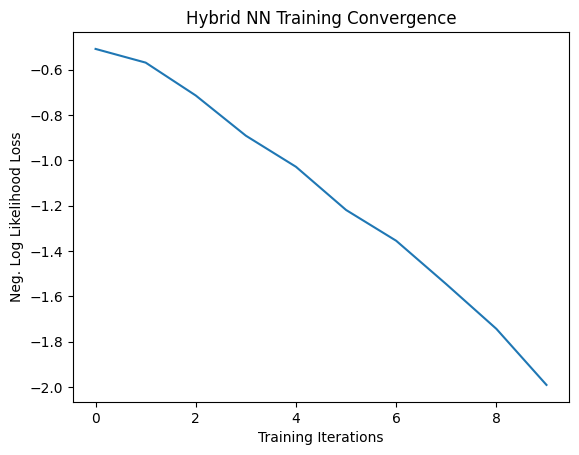

In [45]:
# Plot loss convergence
plt.plot(loss_list)
plt.title("Hybrid NN Training Convergence")
plt.xlabel("Training Iterations")
plt.ylabel("Neg. Log Likelihood Loss")
plt.show()

In [46]:
torch.save(model4.state_dict(), "model4.pt")

In [47]:
qnn5 = create_qnn()
model5 = Net(qnn5)
model5.load_state_dict(torch.load("model4.pt"))

<All keys matched successfully>

In [48]:
model5.eval()  # set model to evaluation mode
with no_grad():

    correct = 0
    for batch_idx, (data, target) in enumerate(test_loader):
        output = model5(data)
        if len(output.shape) == 1:
            output = output.reshape(1, *output.shape)

        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

        loss = loss_func(output, target)
        total_loss.append(loss.item())

    print(
        "Performance on test data:\n\tLoss: {:.4f}\n\tAccuracy: {:.1f}%".format(
            sum(total_loss) / len(total_loss), correct / len(test_loader) / batch_size * 100
        )
    )

Performance on test data:
	Loss: -1.8774
	Accuracy: 93.0%


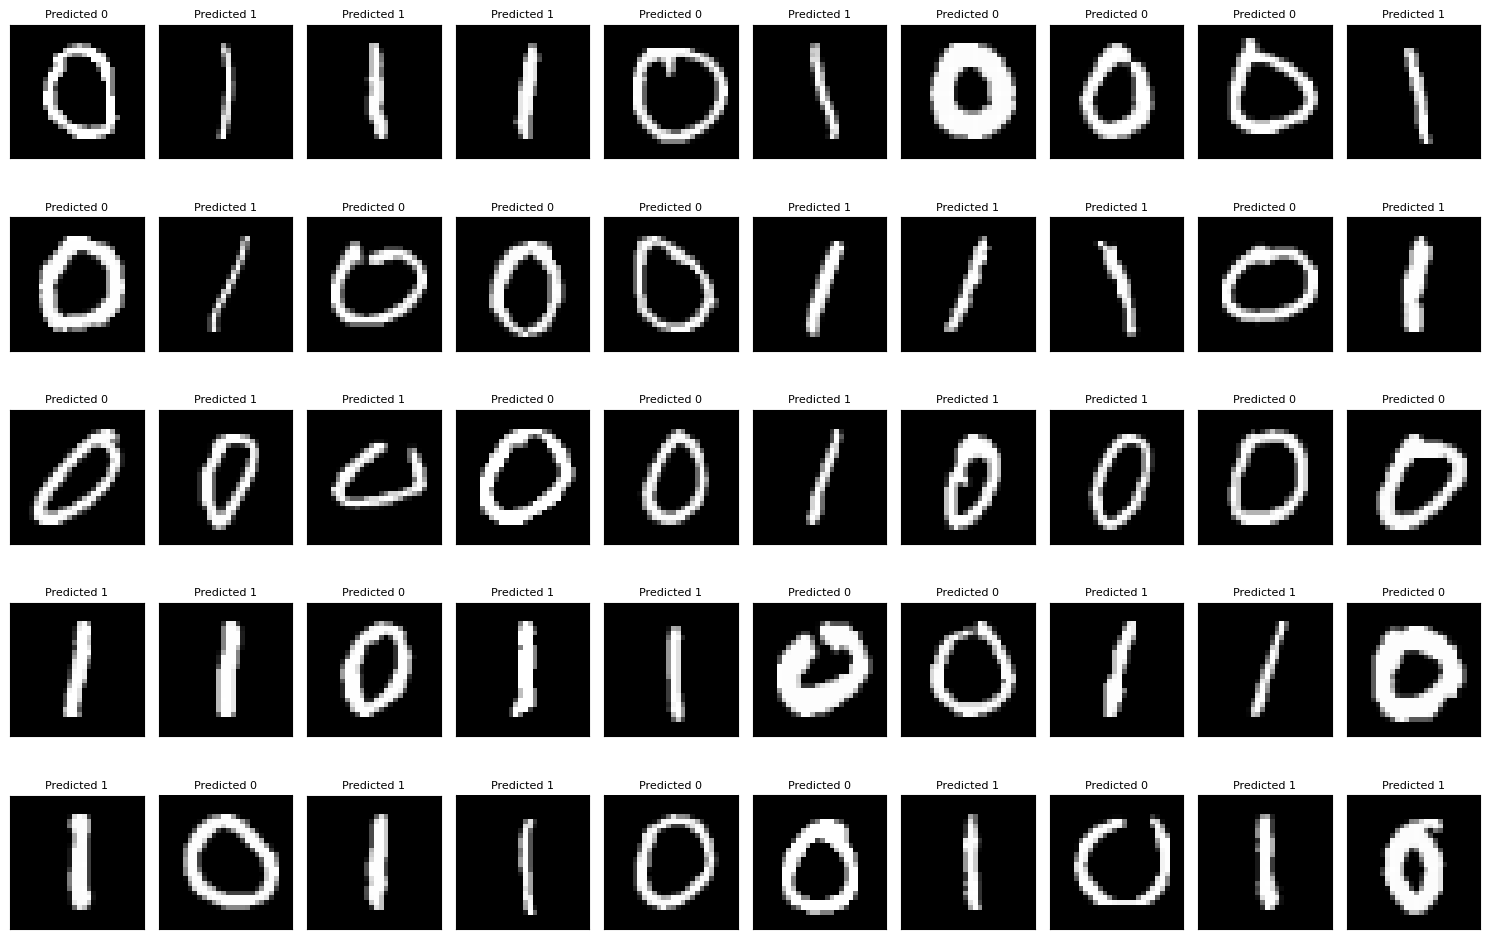

In [49]:
n_samples_show = 50  # Display 50 samples
num_rows = 5  # Number of rows for display
num_cols = 10  # Number of columns for display
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))  # Adjust figsize as needed

model5.eval()
with torch.no_grad():
    count = 0
    for batch_idx, (data, target) in enumerate(test_loader):
        if count == n_samples_show:
            break
        output = model5(data[0:1])
        if len(output.shape) == 1:
            output = output.reshape(1, *output.shape)

        pred = output.argmax(dim=1, keepdim=True)

        row = count // num_cols
        col = count % num_cols

        axes[row, col].imshow(data[0].numpy().squeeze(), cmap="gray")

        axes[row, col].set_xticks([])
        axes[row, col].set_yticks([])

        # Place predicted label below the image
        axes[row, col].text(
            0.5,
            1.05,
            "Predicted {}".format(pred.item()),
            size=8,
            ha="center",
            transform=axes[row, col].transAxes,
        )

        count += 1

plt.tight_layout()
plt.show()
